# Sumário

<div class="alert alert-block alert-info" style="margin-top: 20px">
<div style="background-color: #ffffff; border-left: 6px solid #0066cc; margin-top: 20px; padding: 10px;">

<font size="3" color="#003366"> <!-- Altera a cor e o tamanho do texto -->

1. #### [Entendimento dos Dados](#entendimento-dos-dados)
2. #### [Analise Exploratoria de Dados](#analise-exploratoria)
3. #### [Extra: Exemplo de Analise Preditiva com Redes Neurais](#analise-preditiva)

</font>
</div>

# Entendimento dos Dados

## Requisição 01: Limpeza e Análise de Dados de Vendas

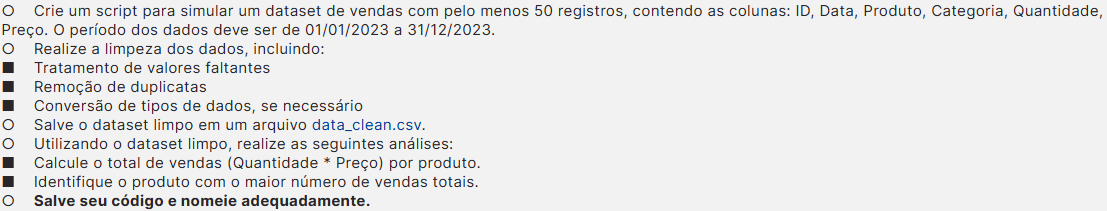

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

# Configurando objetos Pandas DataFrame e Numpy Arrays para exibirem todas as informações
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurando estilo e paleta de cores que serão utilizadas nos gráficos
sns.set_theme(style="whitegrid", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

### Criando o Dataset Ficticio

In [7]:
# Ferragista
estoqueFerragista = {
              'Ferramentas Manuais': ['Martelo','Chave de Fenda','Chave Philips','Alicate', 'Trena', 'Serrote'],
              'Ferramentas Elétricas': ['Furadeira', 'Serra Elétrica', 'Cortador de Azulejo', 'Esmerilhadeira', 'Chave de Impacto'],
              'Ferragens': ['Dobradiça', 'Trinco', 'Parafuso', 'Porca', 'Fechadura', 'Prego', 'Puxador'],
              'Jardinagem': ['Mangueira', 'Pulverizador', 'Rastelo', 'Vassoura', 'Semente', 'Grama m2'],
              'Segurança': ['Máscara', 'Capacete', 'Luva', 'Botas', 'Óculos de Proteção', 'Talabarte', 'Colete', 'Gancho', 'Corda', 'Escada'],
              'Fixação': ['Adesivo', 'Cola', 'Fita Dupla Face', 'Silicone', 'PU', 'Fita Crepe'],
              'Vedação': ['Fita Isolante', 'Fita Veda Rosca', 'Fita Antichamas'],
              'Construção': ['Areia', 'Cimento', 'Tijolo', 'Telha', 'Bloco de Concreto'],
              'Hidráulicos': ['Tubo Cobre','Tubo PVC', 'Conexão', 'Torneira', 'Registro', 'Joelho', 'Luva', 'Válvula', 'Ralo'],
              'Elétricos': ['Disjuntor', 'Lâmpada', 'Interruptor', 'Caixa de Passagem', 'Condulete', 'Tomada', 'Luminária', 'Canaleta'],
              'Pintura': ['Tinta Spray', 'Verniz', 'Rolo', 'Pincel', 'Tinta Latex', 'Lixa', 'Resina', 'Removedor de Tinta']      
}

In [8]:
precoProduto = {
    'Martelo': 24.89, 'Chave de Fenda': 10.39, 'Chave Philips': 14.95, 'Alicate': 19.79, 'Trena': 34.99, 'Serrote': 29.59,
    'Furadeira': 149.49, 'Serra Elétrica': 249.79, 'Cortador de Azulejo': 119.89, 'Esmerilhadeira': 199.69, 'Chave de Impacto': 179.29,
    'Dobradiça': 4.39, 'Trinco': 7.39, 'Parafuso': 1.39, 'Porca': 0.45, 'Fechadura': 29.89, 'Prego': 1.95, 'Puxador': 11.89,
    'Mangueira': 49.99, 'Pulverizador': 79.59, 'Rastelo': 34.49, 'Vassoura': 24.79, 'Semente': 9.95, 'Grama m2': 14.95,
    'Máscara': 9.89, 'Capacete': 44.59, 'Luva': 7.95, 'Botas': 79.79, 'Óculos de Proteção': 19.99, 'Talabarte': 34.89, 'Colete': 89.99,
    'Gancho': 14.89, 'Corda': 59.59, 'Escada': 199.49, 'Adesivo': 4.39, 'Cola': 5.89, 'Fita Dupla Face': 4.39, 'Silicone': 11.89, 
    'PU': 9.95, 'Fita Crepe': 2.95, 'Fita Isolante': 2.49, 'Fita Veda Rosca': 3.39, 'Fita Antichamas': 7.89,
    'Areia': 49.79, 'Cimento': 24.95, 'Tijolo': 0.75, 'Telha': 9.95, 'Bloco de Concreto': 14.89,
    'Tubo Cobre': 24.95, 'Tubo PVC': 9.89, 'Conexão': 4.89, 'Torneira': 34.89, 'Registro': 19.99, 'Joelho': 14.79, 'Luva': 7.89, 
    'Válvula': 19.59, 'Ralo': 11.89, 'Disjuntor': 34.99, 'Lâmpada': 4.39, 'Interruptor': 9.95, 'Caixa de Passagem': 19.79,
    'Condulete': 7.89, 'Tomada': 3.99, 'Luminária': 49.59, 'Canaleta': 14.59, 'Tinta Spray': 39.89, 'Verniz': 24.79, 'Rolo': 14.89, 
    'Pincel': 4.89, 'Tinta Latex': 59.89, 'Lixa': 3.89, 'Resina': 49.99, 'Removedor de Tinta': 19.59
}

In [9]:
# Gerando uma lista de produtos já categorizados
listaProdutos = []
for categoria, produtos in estoqueFerragista.items():
    for produto in produtos:
        listaProdutos.append((produto,categoria))
listaProdutos[:3]        

[('Martelo', 'Ferramentas Manuais'),
 ('Chave de Fenda', 'Ferramentas Manuais'),
 ('Chave Philips', 'Ferramentas Manuais')]

In [10]:
# Gerando as datas no intervalo de 1/01/2023 a 31/12/2023
rangeDatas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D').strftime('%d-%m-%Y').tolist()

In [11]:
# Criando o dataset fictício
dados = []
for i in range(15000):
    # Variável ID - identificador único da venda
    idProduto = i + 1
    
    # Variável Data
    data = random.choice(rangeDatas)
    hora = random.randint(0, 23)
    minuto = random.randint(0, 59)
    segundo = random.randint(0, 59)
    dataCompleta = pd.Timestamp(data) + pd.Timedelta(hours=hora, minutes=minuto, seconds=segundo)

    # Variável Produto e Categoria
    produto, categoria = random.choice(listaProdutos)
    
    # Variável Quantidade
    quantidade = np.random.randint(1, 50)
    
    # Variável Preço
    preco = precoProduto[produto]
    
    dados.append([idProduto, dataCompleta, produto, categoria, quantidade, preco])
dados[:3]

[[1, Timestamp('2023-11-05 13:24:43'), 'Fita Veda Rosca', 'Vedação', 36, 3.39],
 [2,
  Timestamp('2023-07-13 11:59:16'),
  'Serrote',
  'Ferramentas Manuais',
  4,
  29.59],
 [3, Timestamp('2023-11-02 09:16:53'), 'Trinco', 'Ferragens', 42, 7.39]]

In [12]:
# Criando o Dataframe com os dados fictícios
df = pd.DataFrame(dados, columns=['ID', 'Data', 'Produto', 'Categoria','Quantidade', 'Preço'])

In [13]:
# Primeiras linhas
df.head(1)

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-11-05 13:24:43,Fita Veda Rosca,Vedação,36,3.39


In [14]:
# Informações Gerais - Quantidade de Instâncias, Variáveis, Dados Nulos, Tipagem, Consumo de Memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          15000 non-null  int64         
 1   Data        15000 non-null  datetime64[ns]
 2   Produto     15000 non-null  object        
 3   Categoria   15000 non-null  object        
 4   Quantidade  15000 non-null  int64         
 5   Preço       15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 703.3+ KB


In [15]:
# Convertendo variável 'Data' para formato datetime para fácil manipulação
df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y')

In [16]:
df['Data'].dtypes

dtype('<M8[ns]')

O tipo `dtype('<M8[ns]')` é uma forma abreviada para `datetime64` com a precisão de unidade em `nanosegundos`

In [18]:
data_min = df['Data'].min() 
data_max = df['Data'].max()

print(f"As vendas nessa base de dados foram de: {data_min} a {data_max}")

As vendas nessa base de dados foram de: 2023-01-01 01:22:59 a 2023-12-31 22:52:21


### Verificando Dados Nulos

ID            0.0
Data          0.0
Produto       0.0
Categoria     0.0
Quantidade    0.0
Preço         0.0
dtype: float64

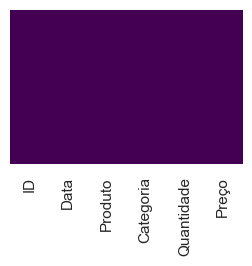

In [20]:
plt.figure(figsize=(3,2))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
display(df.isnull().sum() / len(df))

Esse gráfico do tipo `heatmap` retorna todos os dados duplicados como pequenas linhas amarelas em cada variável, como a base foi construída sem a inclusão de dados nulos não há nenhuma linha desse tipo retornada.

### Tratamento de Dados Nulos
Como mencionado anteriormente não existem dados nulos nessa base, porém irei adicionar como tratá-los a fins demonstrativos.


In [23]:
df.dropna(inplace=True)

O parâmetro `inplace` é comum em diversos métodos dos objetos `DataFrame e Series` do pandas e é uma forma rápida de realizar modificações nos próprios objetos sem a necessidade de reatribuição.

### Verificando Dados Infinitos

ID            0
Quantidade    0
Preço         0
dtype: int64

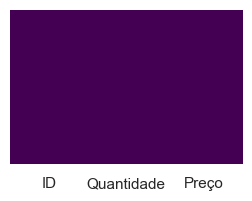

In [26]:
plt.figure(figsize=(3,2))
sns.heatmap(np.isinf(df.select_dtypes(include=['number'])),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
display(np.isinf(df.select_dtypes(include=['number'])).sum())

Esse gráfico do tipo `heatmap` retorna todos os dados infinitos como pequenas linhas amarelas em cada variável, como a base foi construída sem a inclusão de dados nulos não há nenhuma linha desse tipo retornada.

### Verificando Dados Duplicados

In [29]:
df.duplicated(subset=df.columns).sum()

0

O método `.duplicated()` aliado ao `.sum()` nos retorna a quantidade de registros duplicados em toda a base. Nesse caso retornou zero indicando que não há nenhum registro duplicado.

In [31]:
for column in df.columns:
    print(f'Variável {column} tem: {df[column].duplicated().sum()} dados duplicados')

Variável ID tem: 0 dados duplicados
Variável Data tem: 3 dados duplicados
Variável Produto tem: 14928 dados duplicados
Variável Categoria tem: 14989 dados duplicados
Variável Quantidade tem: 14951 dados duplicados
Variável Preço tem: 14951 dados duplicados


A existência de dados duplicados quando analisamos variável por variável se deve ao fato de `existir repetições de valores em cada variável`, podemos analisar por exemplo a `Quantidade`, em que temos diversas vendas com a mesma quantidade, porém `não se refere a uma mesma venda duplicada`. 

### Tratamento de Dados Duplicados
Não existem registros duplicados, como é uma requisição do case abaixo segue como tratá-los caso existissem:

In [34]:
df.drop_duplicates(inplace=True)

### Convertendo Tipos de Dados

In [36]:
df = df.astype({'ID': 'int64',
                'Produto': 'object',
                'Categoria': 'object',
                'Quantidade': 'int64',
                'Preço': 'float64'})

Através do método `.astype()` podemos através de um dicionário mencionar a variável como `key` e o tipo de dado desejado como `value`, podendo trocá-los dependendo da necessidade do problema.

### Salvando os Dados Limpos

In [39]:
df.to_csv('data_clean.csv', index=False)

O parâmetro `index=False` excluirá a variável do índice no salvamento.

### Leitura do Dataset Limpo
Com o dataset salvo, é possível manipulá-lo a partir dessa célula caso não necessite executar os passos anteriores.

In [42]:
df = pd.read_csv('data_clean.csv')

### Calculando o Total de Vendas

In [44]:
df['Total Venda'] = df['Quantidade'] * df['Preço']

In [45]:
df.sample(3)

,ID,Data,Produto,Categoria,Quantidade,Preço,Total Venda
10574,10575,2023-12-16 13:20:19,Chave de Fenda,Ferramentas Manuais,21,10.39,218.19
9444,9445,2023-11-02 19:25:11,Chave de Impacto,Ferramentas Elétricas,16,179.29,2868.64
14228,14229,2023-12-26 23:36:05,Caixa de Passagem,Elétricos,36,19.79,712.44


### Identificando o Produto com o Maior Numero de Vendas Totais

In [47]:
produtoMaisVendido = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(1)
print(f'O produto {produtoMaisVendido.index[0]} foi o mais vendido com {produtoMaisVendido.iloc[0]} vendas totais.')

O produto Luva foi o mais vendido com 11362 vendas totais.


# Analise Exploratoria de Dados

In [49]:
df.head(1)

,ID,Data,Produto,Categoria,Quantidade,Preço,Total Venda
0,1,2023-11-05 13:24:43,Fita Veda Rosca,Vedação,36,3.39,122.04


## Requisição 02: Análise Exploratoria de Dados de Vendas

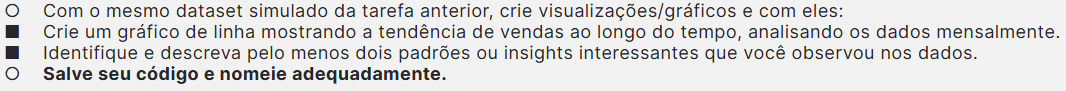

### Estatísticas Descritivas

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,15000.0,7500.500000,4330.271354,1.00,3750.75,7500.50,11250.25,15000.00
Quantidade,15000.0,25.380467,14.173521,1.00,13.00,26.00,38.00,49.00
Preço,15000.0,34.249836,49.330326,0.45,7.89,14.95,34.99,249.79
Total Venda,15000.0,865.836462,1513.846907,0.45,123.69,348.53,881.55,12239.71


O método `.describe()` dos objetos dataframe do pandas nos retorna as estatísticas descritivas da base.
- Temos uma `média` de por volta de 25 produtos em estoque
- O `preço médio` dos produtos está em R\$35,00 com `desvio padrão` de R\$14,00
- A `média de valor de cada venda` por volta de R\$871,77 com `desvio padrão` de R\$1505,27 indica alta variabilidade nos dados, isso significa existem registros de vendas com valores significativamente menores ou maiores que a média.

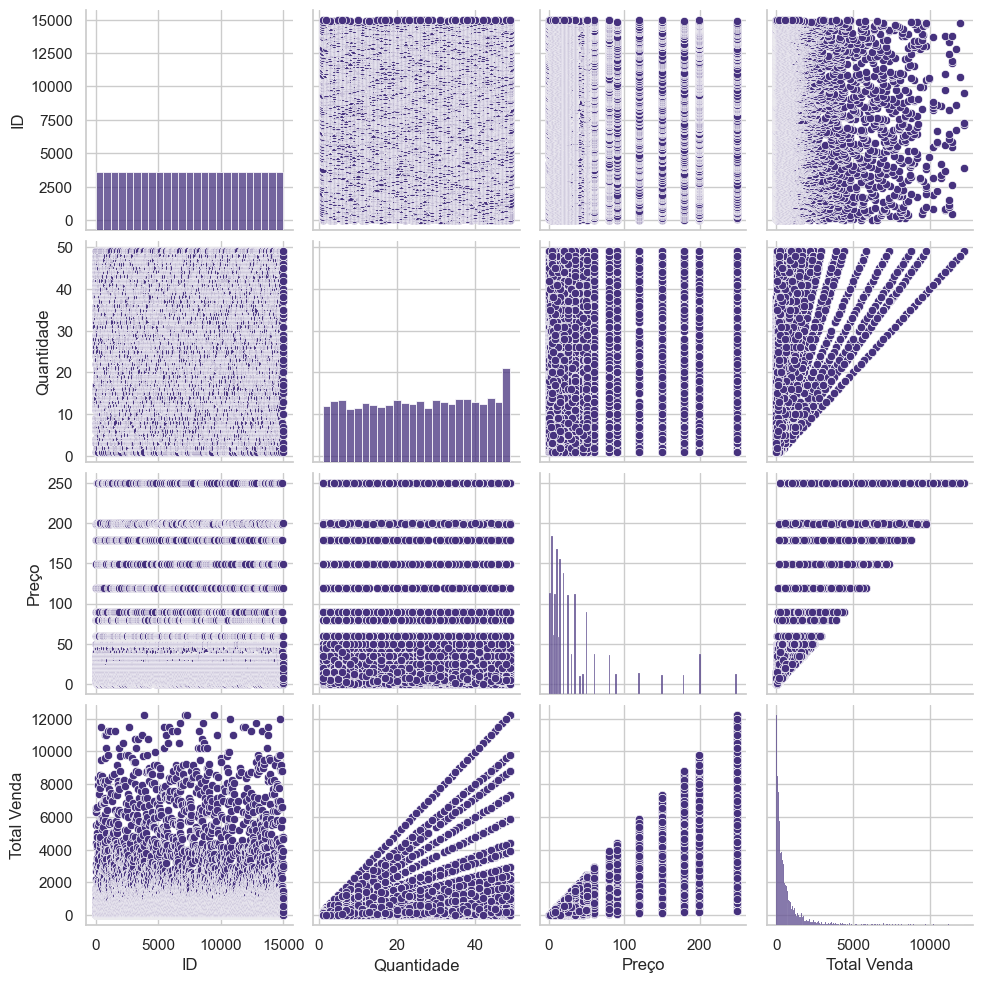

In [55]:
sns.pairplot(df.select_dtypes(include=['number']))

O pairplot é um gráfico do seaborn que exibe `gráficos de dispersão` para pares de variáveis e `distribuições univariadas` na diagonal. Esse gráfico é excelente para uma visão inicial de toda a base, podendo já observar correlações e a distribuição de todos os dados, e caso alguma relação me chame a atenção nesse momento, costumo criar os mesmos gráficos de maneira individualizada para análises mais a fundo.

### Heatmap da Matriz de Correlação

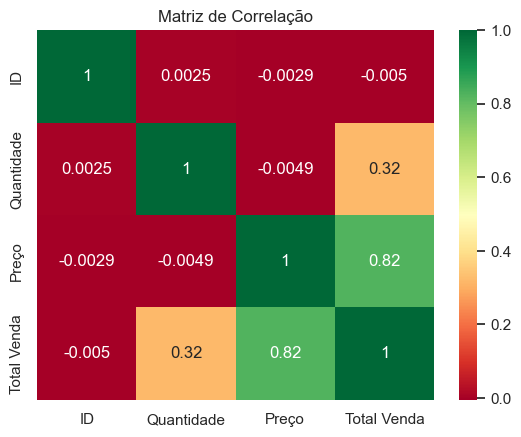

In [58]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),
            annot=True,
            cmap='RdYlGn')

plt.title('Matriz de Correlação')
plt.show()

No heatmap da matriz de correlação cada célula indica o `coeficiente de correlação` com valores variando de `-1 a 1`. Valores próximos de 1 ou -1 indicam correlação forte (positiva ou negativa), enquanto valores próximos de 0 indicam correlação fraca.

### Detecção de Outliers - Boxplot

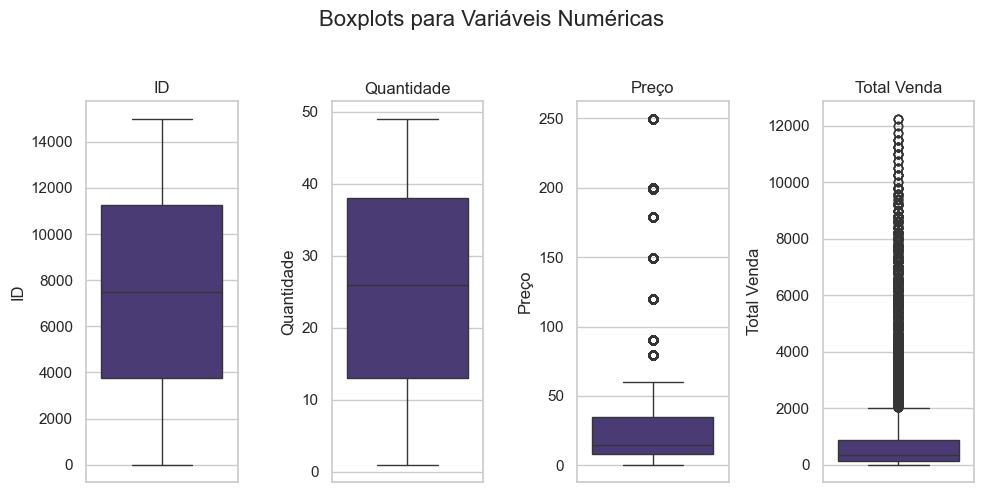

In [61]:
# Boxplots para cada variável numérica através de subplots
fig, axes = plt.subplots(nrows=1,
                         ncols=len(df.select_dtypes(include=['number']).columns),
                         figsize=(10, 5))

fig.suptitle('Boxplots para Variáveis Numéricas', fontsize=16)

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Os outliers/valores discrepantes `são representados como pequenos círculos` que podem estar tanto acima quanto abaixo das whiskers. Foram encontrados nas variáveis `Preço e Total Venda` indicando preços e vendas totais fora do padrão encontrado nos dados.

## Análises temporais

### Feature Engineering - Criando diferentes variáveis de tempo para análises em janelas de tempo separadas individualmente

In [65]:
df['Data'] = pd.to_datetime(df['Data'])
df['Ano'] = pd.to_datetime(df['Data']).dt.year
df['Mês'] = pd.to_datetime(df['Data']).dt.month
df['Dia'] = pd.to_datetime(df['Data']).dt.day
df['Hora'] = pd.to_datetime(df['Data']).dt.hour

In [66]:
df['Dia_da_Semana'] = df['Data'].dt.day_name()

diasPtBr = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'}

df['Dia_da_Semana'] = df['Dia_da_Semana'].replace(diasPtBr)

In [67]:
def definir_periodo(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'
    else:
        return 'Madrugada'
df['Periodo'] = df['Hora'].apply(definir_periodo)

### Volume de Vendas por Mês

In [69]:
volumeMes = df.groupby('Mês')['Quantidade'].sum().reset_index()

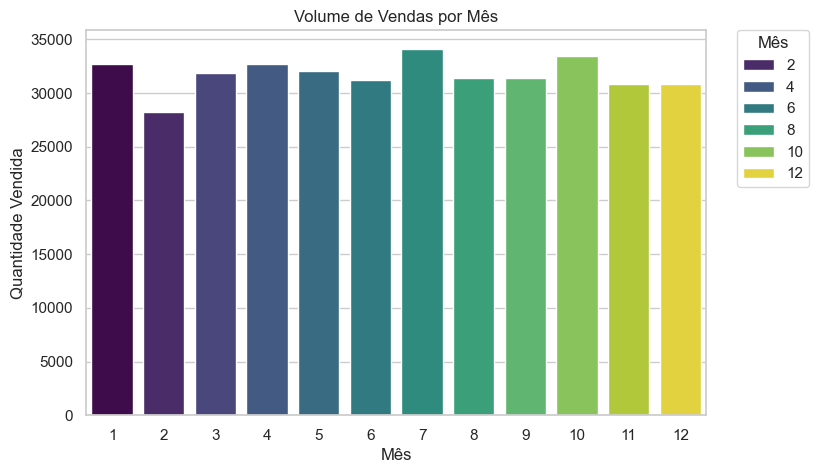

,Mês,Quantidade
6,7,34132
9,10,33412
3,4,32697
0,1,32655
4,5,32068
2,3,31900
7,8,31434
8,9,31413
5,6,31177
11,12,30802


In [70]:
plt.figure(figsize=(8, 5))

sns.barplot(data=volumeMes,
            x='Mês',
            y='Quantidade',
            hue='Mês',
            palette='viridis')

plt.title('Volume de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')

plt.legend(title='Mês',
           bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0)
plt.show()
display(volumeMes.sort_values(by='Quantidade', ascending=False))

A função `plt.legend()` foi utilizada com os argumentos `bbox_to_anchor` e `loc` para posicionarmos a legenda fora do gráfico, facilitando a visualização.

O volume de vendas foi similar em todos os meses, porém foi `maior no mês de Julho com 33377 produtos vendidos` seguido por Janeiro com 32903, o mês de Fevereiro foi o mês com a menor quantidade de vendas, e representa `uma queda de mais de 10% de vendas em relação a Janeiro`. Análises mais aprofundadas podem nos ajudar a entender essa queda percentual.`

### Receita de Vendas por Mês

In [74]:
receitaVendasMes = df.groupby('Mês')['Total Venda'].sum().reset_index()

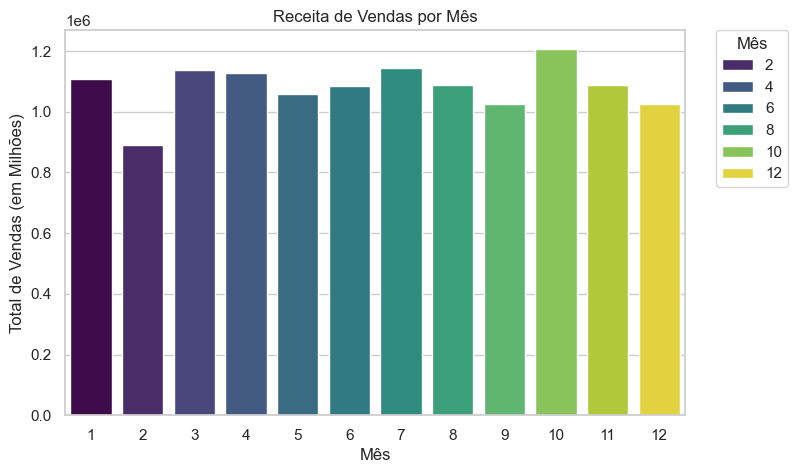

,Mês,Total Venda
9,10,1207857.44
6,7,1143626.88
2,3,1138082.10
3,4,1127777.69
0,1,1106390.11
7,8,1088547.54
10,11,1086862.61
5,6,1085636.75
4,5,1058770.90
11,12,1026634.44


In [75]:
plt.figure(figsize=(8, 5))
sns.barplot(data=receitaVendasMes,
            x='Mês',
            y='Total Venda',
            hue='Mês',
            palette='viridis')

plt.title('Receita de Vendas por Mês') 
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (em Milhões)')

plt.legend(title='Mês',
           bbox_to_anchor=(1.05, 1),
           loc='upper left', borderaxespad=0)
plt.show()
display(receitaVendasMes.sort_values(by='Total Venda', ascending=False))

### Volume de Vendas por Dia da semana

In [77]:
volumeDiaSemana = df.groupby('Dia_da_Semana')['Quantidade'].sum().reset_index()

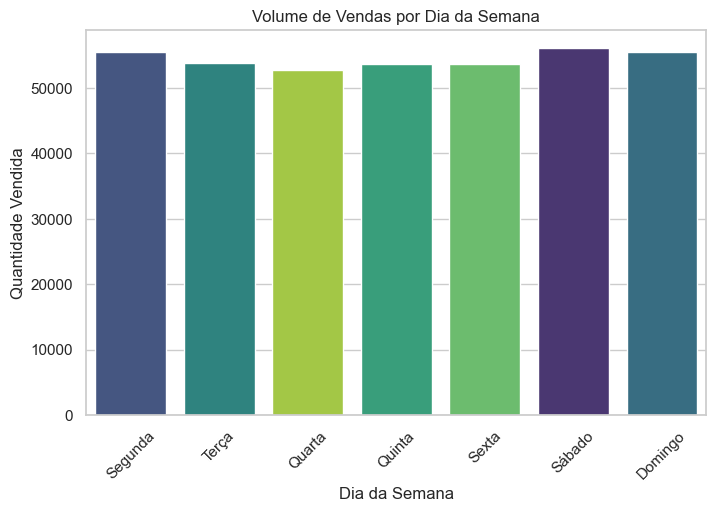

,Dia_da_Semana,Quantidade
5,Sábado,56058
3,Segunda,55497
0,Domingo,55444
6,Terça,53762
2,Quinta,53630
4,Sexta,53601
1,Quarta,52715


In [78]:
plt.figure(figsize=(8, 5))

sns.barplot(data=volumeDiaSemana.sort_values(by='Quantidade', ascending=False),
            x='Dia_da_Semana',
            y='Quantidade',
            order=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
            hue='Dia_da_Semana',
            palette='viridis')

plt.title('Volume de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()
display(volumeDiaSemana.sort_values(by='Quantidade', ascending=False))

### Receita de Vendas por Dia da Semana
- Com esse gráfico é possível entender quais dias da semana a receita foi maior, extremamente útil para estratégias que envolvam melhorar os dias de menor receita quanto os dias mais lucrativos.

In [80]:
receitaDiaSemana = df.groupby('Dia_da_Semana')['Total Venda'].sum().reset_index()

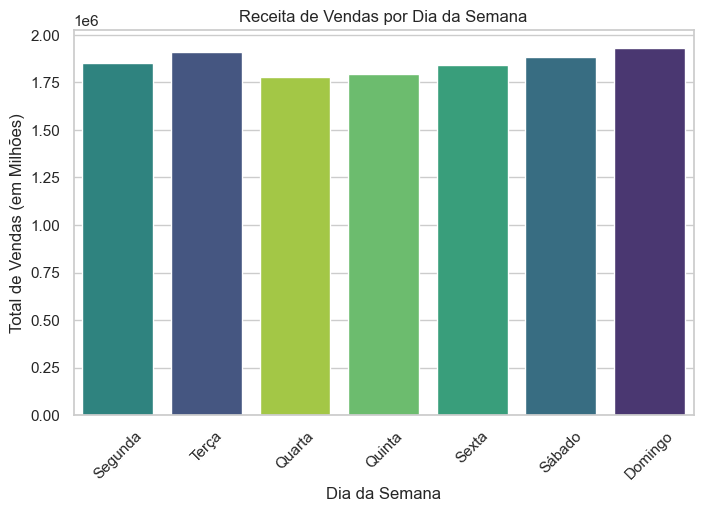

,Dia_da_Semana,Total Venda
0,Domingo,1929399.46
6,Terça,1908477.18
5,Sábado,1884794.00
3,Segunda,1850827.49
4,Sexta,1843085.49
2,Quinta,1792672.16
1,Quarta,1778291.15


In [81]:
plt.figure(figsize=(8, 5))

sns.barplot(data=receitaDiaSemana.sort_values(by='Total Venda', ascending=False),
            x='Dia_da_Semana',
            y='Total Venda',
            order=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
            hue='Dia_da_Semana',
            palette='viridis')

plt.title('Receita de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Vendas (em Milhões)')
plt.xticks(rotation=45)
plt.show()
display(receitaDiaSemana.sort_values(by='Total Venda', ascending=False))

- Podemos notar que `Quarta Feira` é o dia com mais vendas em geral, com quase 2 milhoes de vendas totais realizadas nesse dia, seguido por `Sexta-Feira` e `Domingo`.
- `Estratégias de aumento` de vendas tanto nos dias de maior lucratividade quanto nos menores podem ser realizadas após a identificação dos dias com mais vendas.

### Vendas por Período do Dia + Detecção de Outliers

In [84]:
vendasPorPeriodo = df.groupby('Periodo', observed=True)['Total Venda'].count().reset_index()

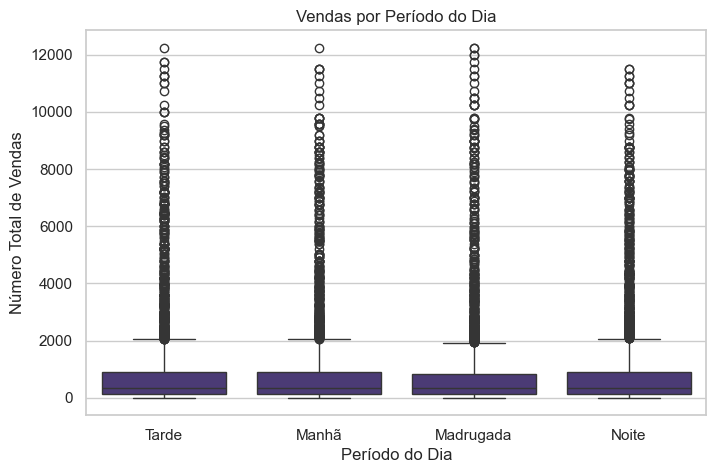

,Periodo,Total Venda
2,Noite,3860
3,Tarde,3800
0,Madrugada,3678
1,Manhã,3662


In [85]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x='Periodo', y='Total Venda')

plt.title('Vendas por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Número Total de Vendas')
plt.show()
display(vendasPorPeriodo.sort_values(by='Total Venda', ascending=False))

- Foram observados valores de vendas muito similares entre os períodos do dia, porém o período da `Madrugada` foi o mais recorrente. 
- Foram detectados diversos outliers com vendas acima dos R$2000, os boxplots são similares devido a quantidade de vendas por período ser similar, sugerindo uma distribuição também similar.

### Análises Univariadas - Quais categorias temos mais produtos em estoque ?
- Serão analisadas as distribuições das variáveis `Categoria` e `Quantidade` para vermos quais categorias temos mais produtos em estoque e quais quantidades são mais frequentes desses produtos

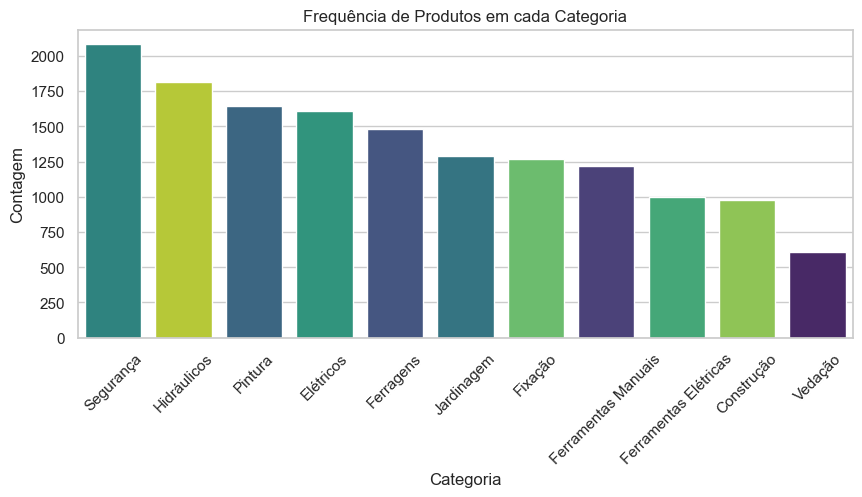

Categoria
Segurança                2083
Hidráulicos              1818
Pintura                  1646
Elétricos                1607
Ferragens                1481
Jardinagem               1292
Fixação                  1269
Ferramentas Manuais      1220
Ferramentas Elétricas    1001
Construção                976
Vedação                   607
Name: count, dtype: int64

In [88]:
# Gráfico de Barras com as contagens de produtos em cada categoria
plt.figure(figsize=(10, 4))

sns.countplot(data=df,
              x='Categoria',
              order=df['Categoria'].value_counts().index,
              palette='viridis',
              hue='Categoria')

plt.title('Frequência de Produtos em cada Categoria')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

display(df['Categoria'].value_counts())

O gráfico `countplot` do seaborn nos permite analisar a distribuição de variáveis categóricas. 
- Nesse gráfico é possível notar que a categoria de `Segurança` possui mais produtos que as demais totalizando 2085 no total, seguido por `Hidráulicos e Elétricos` com 1899 e 1668 produtos respectivamente.
- São quantidades bastante similares mas que refletem um foco da empresa em ofertar mais produtos de determinadas categorias em função de outras. 

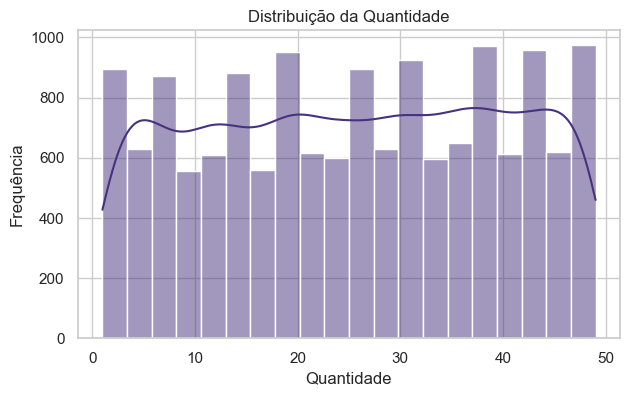

In [90]:
# Histograma da distribuição da quantidade de produtos
plt.figure(figsize=(7, 4))

sns.histplot(data=df,
             x='Quantidade',
             kde=True,
             bins=20)

plt.title('Distribuição da Quantidade')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

As quantidades de produtos em estoque `variam entre 0 a 50` devido a limitação dada na criação dos dados, porém podemos notar alguns valores intermediários como `5, 15, 37` etc que são mais `recorrentes`.

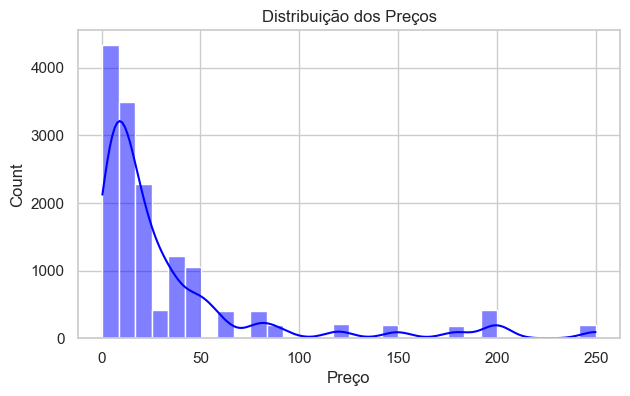

In [92]:
# Histograma da distribuição dos preços
plt.figure(figsize=(7, 4))

sns.histplot(data=df,
             x='Preço',
             kde=True,
             bins=30,
             color='blue')

plt.title('Distribuição dos Preços')
plt.show()

Os preços dos produtos `variam entre 0 a 250`e a distribuição dos preços nos mostra que a `maioria dos preços dos produtos varia entre 0 a 50`, sendo valores `entre 0 a 20 os mais recorrentes` entre os produtos ofertados pela ferragista

## Análise Multivariada

### Preço médio por Categoria

In [96]:
# Calculando o preço médio em cada categoria de produtos
precoMedioPorCategoria = df.groupby('Categoria')['Preço'].mean().reset_index()

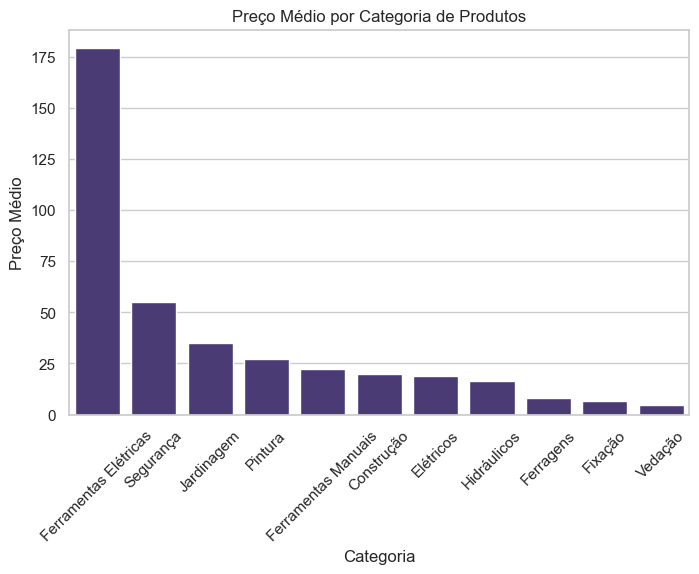

,Categoria,Preço
3,Ferramentas Elétricas,179.238951
9,Segurança,55.013860
7,Jardinagem,35.222802
8,Pintura,27.038238
4,Ferramentas Manuais,22.187705
0,Construção,19.596209
1,Elétricos,19.044810
6,Hidráulicos,16.570011
2,Ferragens,7.920614
5,Fixação,6.494665


In [97]:
plt.figure(figsize=(8, 5))

sns.barplot(data=precoMedioPorCategoria.sort_values(by='Preço', ascending=False), x='Categoria', y='Preço')

plt.title('Preço Médio por Categoria de Produtos')
plt.xlabel('Categoria')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()
display(precoMedioPorCategoria.sort_values(by='Preço', ascending=False))

### Receita total por Categoria

In [99]:
receitaPorCategoria = df.groupby('Categoria')['Total Venda'].sum().reset_index()

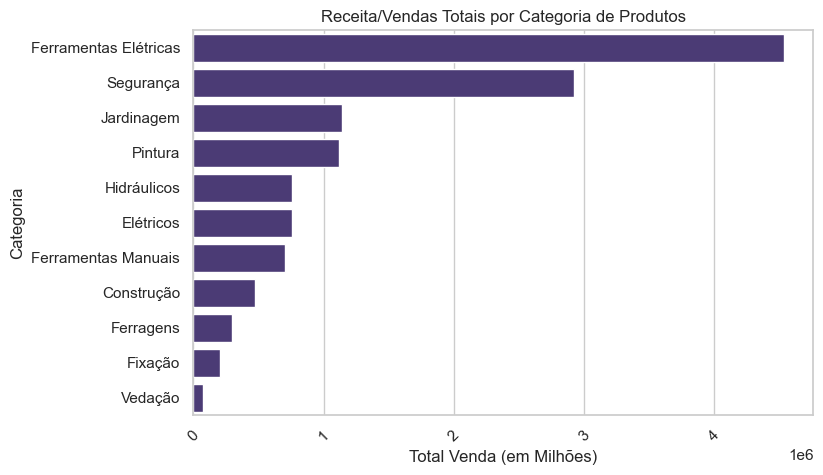

,Categoria,Total Venda
3,Ferramentas Elétricas,4532649.37
9,Segurança,2918502.31
7,Jardinagem,1142089.97
8,Pintura,1115054.81
6,Hidráulicos,759899.30
1,Elétricos,759132.31
4,Ferramentas Manuais,707062.03
0,Construção,477012.46
2,Ferragens,298742.84
5,Fixação,204023.78


In [100]:
plt.figure(figsize=(8, 5))

sns.barplot(data=receitaPorCategoria.sort_values(by='Total Venda', ascending=False),
            y='Categoria',
            x='Total Venda')

plt.title('Receita/Vendas Totais por Categoria de Produtos')
plt.ylabel('Categoria')
plt.xlabel('Total Venda (em Milhões)')
plt.xticks(rotation=45)
plt.show()
display(receitaPorCategoria.sort_values(by='Total Venda', ascending=False))

### Produtos Mais Vendidos

In [102]:
produtosMaisVendidos = df.groupby('Produto')['Quantidade'].sum().nlargest(10).reset_index() # .nlargest(10) seleciona apenas o top 10 produtos mais vendidos

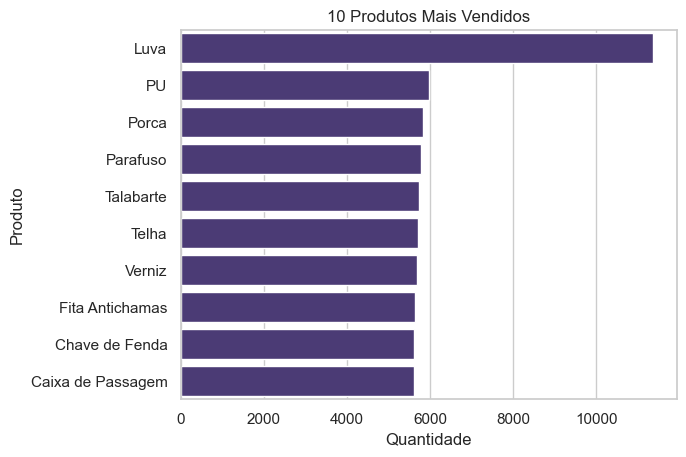

,Produto,Quantidade
0,Luva,11362
1,PU,5977
2,Porca,5826
3,Parafuso,5774
4,Talabarte,5723
5,Telha,5699
6,Verniz,5695
7,Fita Antichamas,5626
8,Chave de Fenda,5621
9,Caixa de Passagem,5613


In [103]:
sns.barplot(data=produtosMaisVendidos.sort_values(by='Quantidade', ascending=False), x='Quantidade', y='Produto')
plt.title('10 Produtos Mais Vendidos')
plt.show()
display(produtosMaisVendidos.sort_values(by='Quantidade', ascending=False))

### Análise Cruzada
- Será analisado como diferentes categorias influenciam o preço dos produtos.

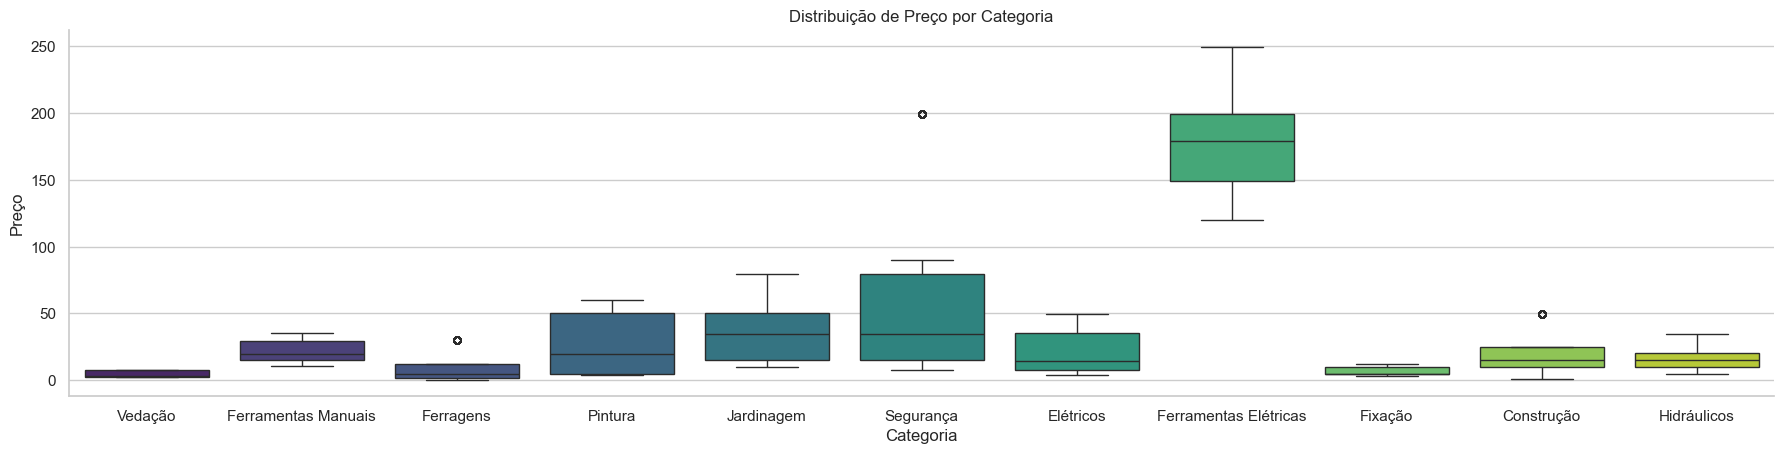

In [105]:
sns.catplot(data=df, x='Categoria', y='Preço', kind='box', palette='viridis', hue='Categoria', height=4.5, aspect=4)
plt.title('Distribuição de Preço por Categoria')
plt.show()

O gráfico mostra a distribuição de preços entre as categorias de produtos. Foi observado que a categoria `Ferramentas Elétricas` possui os `preços mais altos`, com `maior mediana, primeiro e terceiro quartis`, indicando uma ampla variedade de preços de produtos.

Categorias como Hidráulicos, Fixação e Vedação apresentam preços medianos mais baixos e menor variabilidade, pos`sivelmente representando produtos mais simples ou essenciais.
Foram detectados também outliers em algumas categorias, como Ferragens, sugerindo a presença de itens com maiores valores ou discrepâncias nos dados.

# Extra: Exemplo de Analise Preditiva com Redes Neurais
Após uma longa jornada aprendendo diferentes algoritmos de aprendizado de máquina supervisionados e não-supervisionados para problemas de regressão, classificação e clustering, tenho focado agora meus estudos em redes neurais tradicionais, recorrentes e convolucionais. 
Segue abaixo uma pequena demonstração da implementação de uma arquitetura simples de redes neurais para de execução de uma análise preditiva, será feita uma simples execução para classificação das variáveis categóricas e regressão para o preço do produto.

| Camada                | Neurônios | Função de Ativação  | Observações                          |
|-----------------------|-----------|---------------------|---------------------------------------|
| **Camada de Entrada** | X_train.shape[1]         | -                   | 7 features de entrada                |
| **1ª Camada Oculta**  | 128       | ReLU                | Inicia com 128 neurônios             |
| **2ª Camada Oculta**  | 64        | ReLU                | Reduz para 64 neurônios              |
| **3ª Camada Oculta**  | 32        | ReLU                | Reduz para 32 neurônios              |
| **Camada de Saída**   | 1/n_classes         | Nenhuma - Softmax                  | Saída para regressão ou classificação |


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

### Rede Neural para Regressão

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

In [112]:
def regression_model(df, target_col='Preço'):
    """
    Cria e treina uma rede neural para predizer valores numéricos
    """
    # Separando Features e Target - Variáveis preditoras e resposta
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identificando colunas numéricas e categóricas
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Pré-processamento de variáveis numéricas (scaling) e categóricas (one-hot encoding)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ])

    # Divisão em Treino e Teste - 80% treino 20% teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Aplicando os pré-processamentos nos dados de treino
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    # Definindo modelo Sequencial
    model = Sequential()

    # Camada de Entrada
    model.add(Input(shape=(X_train.shape[1],)))

    # Camadas Ocultas
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    # Camada de Saída - Predição da Variável Numérica desejada
    model.add(Dense(units=1)) 

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Treinando o modelo - Ajustando o modelo aos dados de treino
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Predições
    y_pred = model.predict(X_test)
    
    # Métricas Root Mean Squared Error e R2 Score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Plotando a perda - loss function
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2124.8408 - mae: 24.4982 - val_loss: 118.3468 - val_mae: 5.7162
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 248.4094 - mae: 8.3052 - val_loss: 29.2673 - val_mae: 3.2184
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 190.6767 - mae: 7.2578 - val_loss: 15.8209 - val_mae: 2.5536
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 177.7647 - mae: 6.7641 - val_loss: 19.0144 - val_mae: 2.5747
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 161.8573 - mae: 6.3923 - val_loss: 13.6855 - val_mae: 2.2461
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 157.5336 - mae: 6.2932 - val_loss: 16.8448 - val_mae: 2.6493
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 132.3171 - mae: 5.8906 - val_loss: 17.1432 - val_mae: 2.4122
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 138.5998 - mae: 5.8106 - val_loss: 13.1325 - val_mae: 2.2272
Epoch 9/50
375/

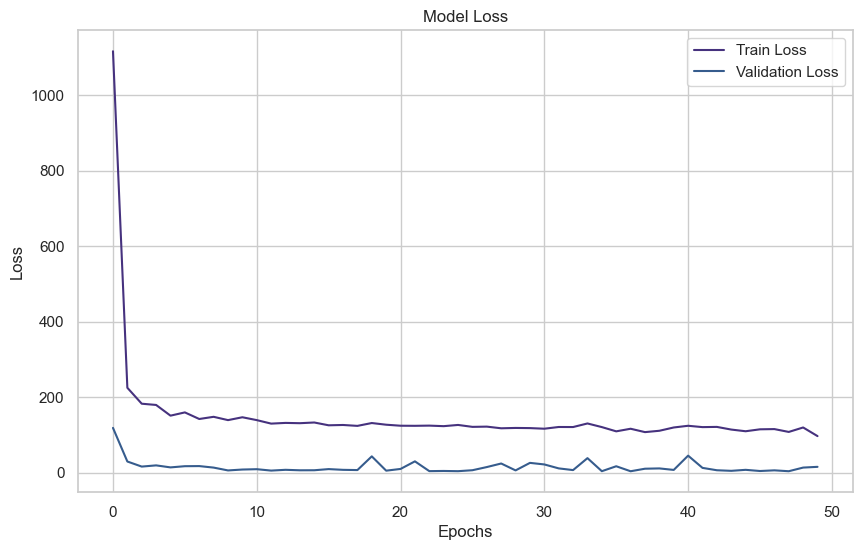

RMSE: 3.892477101762854
R2: 0.9941035295989027


In [113]:
regression_model(df, target_col='Preço') # target_col faz troca da variável numérica desejada para a predição

### Rede Neural para Classificação

In [115]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [116]:
def classification_model(df, target_col='Categoria'):
    """
    Cria e treina uma rede neural para predizer valores categóricos.
    """
    # Separando Features e Target - Variáveis preditoras e resposta
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identificando colunas numéricas e categóricas
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Pré-processamento de variáveis numéricas (scaling) e categóricas (one-hot encoding)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # Divisão em Treino e Teste - 80% treino 20% teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Aplicando os pré-processamentos nos dados de treino
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # Convertendo target em numérico
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)       

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Definindo modelo Sequencial
    model = Sequential()

    # Camada de entrada 
    model.add(Input(shape=(X_train.shape[1],)))

    # 3 Camadas Ocultas - 128/64/32 neurônios
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    # Camada de Saída
    model.add(Dense(units=y_train.shape[1], activation='softmax')) 

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Treinando o modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    # Predições
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Avaliação do Modelo
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Plotando a perda - loss function
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotando a Acurácia
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    ticks = np.arange(len(np.unique(np.argmax(y_test, axis=1))))
    plt.xticks(ticks, ticks)
    plt.yticks(ticks, ticks)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(f'Accuracy: {accuracy}')

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2346 - loss: 2.1176 - val_accuracy: 0.9890 - val_loss: 0.1266
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9223 - loss: 0.2790 - val_accuracy: 0.9880 - val_loss: 0.0210
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9718 - loss: 0.0943 - val_accuracy: 0.9893 - val_loss: 0.0167
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9783 - loss: 0.0602 - val_accuracy: 0.9877 - val_loss: 0.0174
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9796 - loss: 0.0515 - val_accuracy: 0.9900 - val_loss: 0.0159
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.9777 - loss: 0.0458 - val_accuracy: 0.9913 - val_loss: 0.0153
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.9840 - loss: 0.0370 - val_accuracy: 0.9897 - val_loss: 0.0158
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9810 - loss: 0.0351 - va

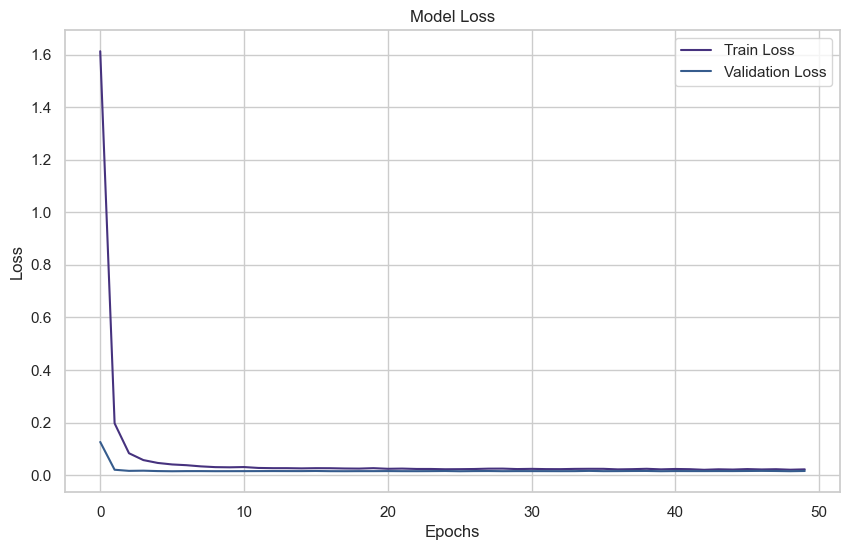

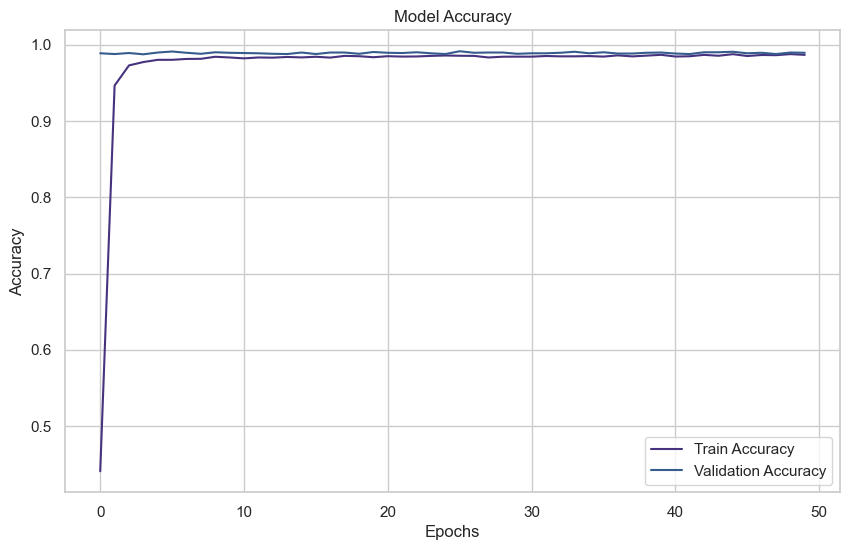

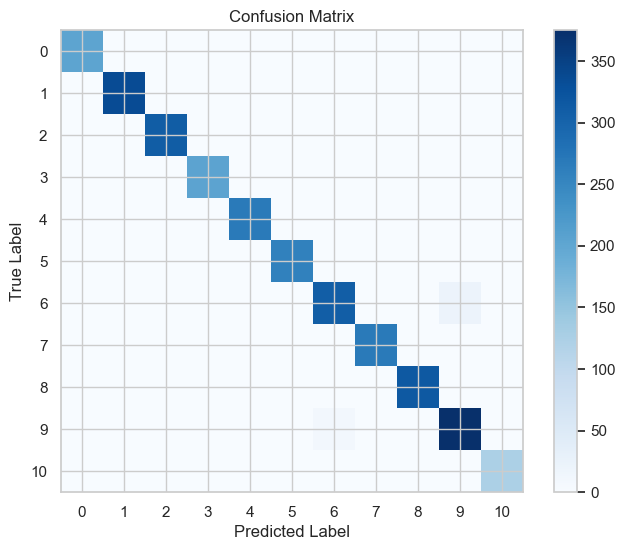

Accuracy: 0.9896666666666667


In [117]:
classification_model(df, target_col='Categoria') # target_col faz troca da variável categórica desejada para a predição